<a href="https://colab.research.google.com/github/Rinarsm/Pengolahan-Citra-Digital/blob/main/Tugas_Pengolahan_Citra_Digital_Deteksi_Plat_Nomor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

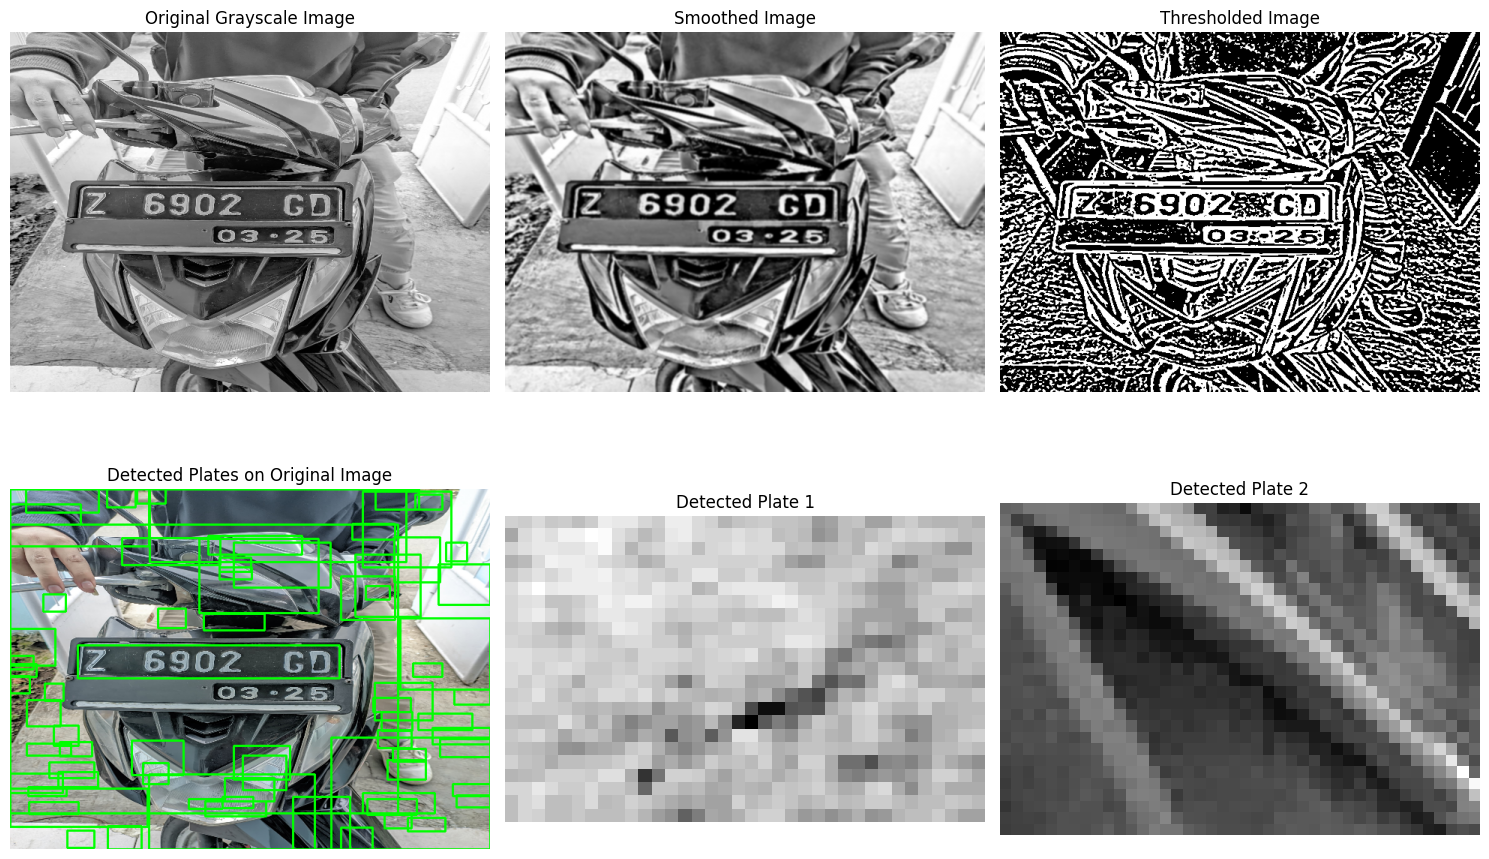

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Pre-processing
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (640, 480))  # Resize for consistency

    # Convert RGB to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray = hsv[:, :, 2]  # Extract grayscale from HSV (Value channel)

    # Morphological transformations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
    processed = cv2.add(gray, tophat)
    processed = cv2.subtract(processed, blackhat)

    # Gaussian smoothing
    smoothed = cv2.GaussianBlur(processed, (5, 5), 0)

    # Adaptive Gaussian Thresholding
    binary = cv2.adaptiveThreshold(
        smoothed, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )

    return image, gray, smoothed, binary

# Step 2: Detect Number Plate using Contours
def detect_plate(binary_image):
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    plate_candidates = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = w * h
        if area > 500 and 1 < aspect_ratio < 8:  # Filter by area and aspect ratio
            plate_candidates.append((x, y, w, h))

    return plate_candidates

# Visualization and Testing
def visualize_results(image_path):
    # Preprocess the image
    original, gray, smoothed, binary = preprocess_image(image_path)

    # Detect number plates
    plates = detect_plate(binary)

    # Draw rectangles around detected plates
    result_image = original.copy()
    for x, y, w, h in plates:
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.title("Original Grayscale Image")
    plt.imshow(gray, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.title("Smoothed Image")
    plt.imshow(smoothed, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 3, 3)
    plt.title("Thresholded Image")
    plt.imshow(binary, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 3, 4)
    plt.title("Detected Plates on Original Image")
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Show up to 2 detected plates (if available)
    for idx, (x, y, w, h) in enumerate(plates[:2]):
        plate_image = gray[y:y + h, x:x + w]
        plt.subplot(2, 3, 5 + idx)
        plt.title(f"Detected Plate {idx + 1}")
        plt.imshow(plate_image, cmap="gray")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example Usage
image_path = "Plat2.jpg"  # Replace with the path to your image
visualize_results(image_path)


### **Penjelasan Program Deteksi dan Segmentasi Plat Nomor**

# 1. Load Gambar
Gambar dimuat dari path yang diberikan menggunakan fungsi cv2.imread. Format gambar diubah menjadi grayscale menggunakan kanal value dari konversi HSV (cv2.cvtColor) untuk meningkatkan kontras dan mempermudah pengolahan citra.

# 2. Pre-processing
Gambar diproses melalui beberapa tahap untuk memperjelas objek (plat nomor):

- Morphological Transformations:
    - Operasi Top-Hat (cv2.morphologyEx) menyoroti bagian cerah pada latar gelap.
    - Operasi Black-Hat (cv2.morphologyEx) menyoroti bagian gelap pada latar cerah.
    - Gabungan hasil operasi ini menonjolkan fitur-fitur tertentu pada gambar seperti tepi plat nomor.
- Gaussian Blur:
Digunakan untuk mengurangi noise dan memperhalus citra, sehingga mempermudah segmentasi.
- Thresholding Adaptif:
Metode threshold adaptif (cv2.adaptiveThreshold) digunakan untuk menghasilkan citra biner yang memisahkan objek (plat nomor) dari latar belakang berdasarkan intensitas piksel lokal.

# 3. Deteksi Plat Nomor dengan Kontur
Kontur gambar diambil menggunakan fungsi cv2.findContours. Setiap kontur diperiksa berdasarkan:
- Bounding Box: Wilayah kontur dikelilingi oleh kotak pembatas.
- Aspect Ratio: Rasio antara lebar dan tinggi kotak pembatas dianalisis. Plat nomor umumnya memiliki rasio aspek antara 2 hingga 6. Kontur yang sesuai dengan kriteria ini disimpan sebagai kandidat plat nomor.

# 4.	Segmentasi dan Visualisasi Hasil
Hasil pre-processing dan deteksi divisualisasikan menggunakan pustaka matplotlib. Visualisasi mencakup:
- Original Grayscale Image: Gambar asli dalam format grayscale.
- Smoothed Image: Gambar yang telah dilicinkan menggunakan Gaussian Blur.
- Thresholded Image: Hasil segmentasi biner untuk memisahkan objek dari latar belakang.
- Detected Plates: Potongan gambar yang dideteksi sebagai kandidat plat nomor ditampilkan. Jika tidak ada plat nomor terdeteksi, pesan "No Plates Detected" ditampilkan.

# 5.	Langkah-Langkah Utama dalam Kode
- preprocess_image: Fungsi ini bertanggung jawab untuk membaca gambar, melakukan operasi morfologi, dan menghasilkan citra biner.
- detect_plate: Fungsi ini mendeteksi kandidat plat nomor berdasarkan kontur yang memenuhi kriteria tertentu.
- visualize_results: Fungsi untuk menggabungkan hasil pre-processing, deteksi, dan menampilkannya dalam bentuk visualisasi.

## Tujuan Program
- Menemukan area pada citra yang berpotensi sebagai plat nomor kendaraan.
- Mempermudah proses pengenalan karakter plat nomor menggunakan metode selanjutnya seperti OCR (Optical Character Recognition).

## Hasil Pengolahan Citra
1.	**Original Grayscale Image**
Gambar asli dalam format grayscale dihasilkan menggunakan kanal value dari konversi HSV.
2.	**Smoothed Image**
Gambar yang telah melalui Gaussian Blur, menampilkan area dengan transisi intensitas lebih halus.
3.	**Thresholded Image**
Citra biner hasil segmentasi menunjukkan area objek (plat nomor) yang lebih terisolasi dari latar belakang.
4.	**Detected Plates**
Area yang dideteksi sebagai kandidat plat nomor divisualisasikan dalam potongan-potongan gambar kecil.

## Kesimpulan
Kode ini bertujuan untuk mendeteksi dan memproses citra sehingga plat nomor kendaraan dapat diidentifikasi. Dengan deteksi berbasis kontur dan thresholding adaptif, program ini mampu menemukan wilayah yang sesuai dengan karakteristik plat nomor. Langkah ini dapat diintegrasikan lebih lanjut dengan OCR untuk membaca teks pada plat nomor.



